In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

https://stackoverflow.com/questions/77714128/how-to-perform-a-chi-square-test-of-two-curves-while-considering-their-x-values

In [2]:
def model(x, a, b, c):
    return a * x**2 + b * x + c

In [3]:
np.random.seed(12345)
x0 = np.linspace(-1, 1, 200)
x1 = x0 * 0.5  + 1.
p0 = (1, 2, 3)
y = model(x0, *p0)
n = 0.05 * np.random.normal(size=y.size)
yn = y + n

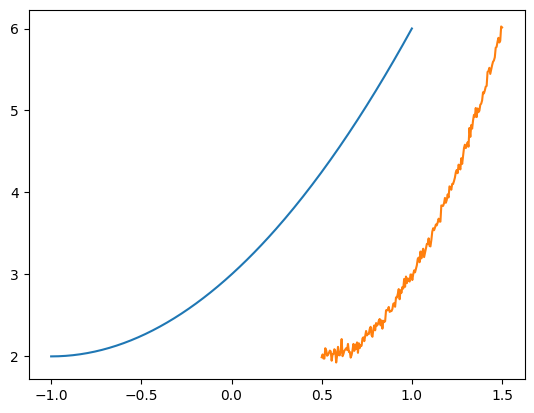

In [4]:
fig, axe = plt.subplots()
axe.plot(x0, y)
axe.plot(x1, yn)

In [5]:
def residuals_factory(x0, y0, p0):
    def residuals(beta):
        x = x0 * beta[0] + beta[1] 
        y = model(x, *p0)
        return (y0 - y)
    return residuals

In [6]:
residuals = residuals_factory(x1, yn, p0)

In [7]:
solution = optimize.least_squares(residuals, x0=[1., 1.])

In [8]:
solution.x

array([ 2.00417645, -2.00522934])

In [9]:
def adapted_model(x, scale, loc):
    x0 = (x - loc) / scale
    return model(x0, *p0)

In [10]:
popt, pcov = optimize.curve_fit(adapted_model, x1, yn, p0=[1, -1])

In [15]:
popt, pcov

(array([0.49895806, 1.00052535]),
 array([[ 3.90617479e-06, -1.97083511e-06],
        [-1.97083511e-06,  1.58383376e-06]]))

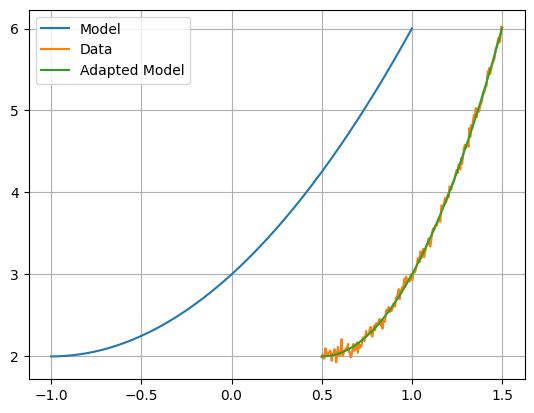

In [14]:
fig, axe = plt.subplots()
axe.plot(x0, y, label="Model")
axe.plot(x1, yn, label="Data")
axe.plot(x1, adapted_model(x1, *popt), label="Adapted Model")
axe.legend()
axe.grid()